## Looking for patterns in the UK flora

There is a long history of botanical recording on the islands of Britain and Ireland (comprising England, Scotland, Wales, Northern Ireland, Republic of Ireland, Isle of Man and the Channel Islands; Fig. 1, referred to here as ‘BI’), with the earliest systematic records dating back to Sir John Ray in 16901. The Botanical Society of Britain and Ireland (BSBI)2 provides access to large-scale geographic distribution data based on more than 40 million occurrence records, allowing for unique research into changes within the flora, especially throughout the last century.  

As part of the Darwin Tree of Life program (https://www.darwintreeoflife.org/) a database was assembled which put together data from the most recent reference flora of Britain and Ireland, with taxon names linked to unique Kew taxon identifiers and DNA barcode data. 

It covers 3,227 species and 26 traits includes genome sizes, chromosome numbers and life strategy and life-form assessments, along with data on functional traits, species distribution metrics, hybrid propensity, associated biomes, realized niche description, native status and geographic origin of alien species.

Henniges, M.C., Powell, R.F., Mian, S. et al. A taxonomic, genetic and ecological data resource for the vascular plants of Britain and Ireland. Sci Data 9, 1 (2022). https://doi.org/10.1038/s41597-021-01104-5

![](image.png) 

The vascular flora of Britain and Ireland is among the most extensively studied in the world, but the
current knowledge base is fragmentary, with taxonomic, ecological and genetic information scattered
across different resources. Here we present the first comprehensive data repository of native and alien
species optimized for fast and easy online access for ecological, evolutionary and conservation analyses.
The inventory is based on the most recent reference flora of Britain and Ireland, with taxon names linked to unique Kew taxon identifiers and DNA barcode data. Our data resource for 3,227 species and 26 traits includes existing and unpublished genome sizes, chromosome numbers and life strategy and life-form assessments, along with existing data on functional traits, species distribution metrics, hybrid propensity, associated biomes, realized niche description, native status and geographic origin of alien species. this resource will facilitate both fundamental and applied research and enhance our understanding of the flora’s composition and temporal changes to inform conservation efforts in the face of ongoing climate change and biodiversity loss.

##### Setting up the basic analysis environment

In [1]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
np.set_printoptions(precision=5, suppress=True)  # suppress scientific floatation 
sns.set(color_codes=True)
%matplotlib inline
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Download the data

You can download the data directly, but there is also a copy in the folder in case of complications with this step.

In [3]:
! curl https://data-package.ceh.ac.uk/data/9f097d82-7560-4ed2-af13-604a9110cf6d.zip > UKFlora.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  863k    0  863k    0     0  2068k      0 --:--:-- --:--:-- --:--:-- 2064k


bi_database.docx  gives detail on the sources and how the databse was put together.  Lots of useful definitions here.  
database_structure.csv contains metrics for the database (type of data, completness)  
detailed_sources.csv gives references for all the data and is a great source of further reading.  

Unzip the file

In [4]:
! unzip UKFlora.zip

Archive:  UKFlora.zip
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/readme.html  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/database_structure.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/detailed_sources.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/bi_database.docx  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/data/GS_Kew_BI.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/data/BI_main.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/data/GS_BI.csv  
  inflating: 9f097d82-7560-4ed2-af13-604a9110cf6d/data/chrom_num_BI.csv  


Check what's inside it

In [6]:
! ls 9f097d82-7560-4ed2-af13-604a9110cf6d/

data                 readme.html          supporting-documents


In [7]:
! ls 9f097d82-7560-4ed2-af13-604a9110cf6d/data/

BI_main.csv      GS_BI.csv        GS_Kew_BI.csv    chrom_num_BI.csv


The main database BI_main.csv lists all taxa included in this work along with their identification number (kew_id), associated taxonomic authorities, taxonomic ranks (order, family, genus, subgenus, section, subsection, series, species, group, aggregate), associated trait, distribution, and ecological data. The main database contains a summary of chromosome numbers and the smallest genome size measurement available per species.   
 
Because more than one chromosome number and genome size measurement has been reported for many species – often reflecting considerable infraspecific variance – these additional chromosome number (chrom_num_BI.csv) and genome size (GS_BI.csv) data are published along with the main dataset as separate files. Detailed information about the newly generated genome size measurements from RBG Kew are summarized in GS_Kew_BI.csv, including information on the calibration standard species and extraction buffers used to estimate the genome size.

#### BI_main.csv  


In [10]:
! head -2 9f097d82-7560-4ed2-af13-604a9110cf6d/data/BI_main.csv

kew_id,unclear_species_marker,extinct_species_marker,taxon_name,taxon_name_binom,authors,taxon_name_WCVP,authors_WCVP,order,family,genus,subgenus,section,subsection,series,species,group,aggregate,members_of_agg.,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,imperfect_match_with_Stace_IV,WCVP_URL,POWO_URL,IPNI_URL,accepted_WCVP_URL,StaceIV_nativity,Atlas_nativity_viaALIENATT_PLANTATT,Stace_Crawley_nativity_aliens,SLA,LDMC,seed_mass,leaf_area,mean_veg_height,max_veg_height,L_PLANTATT,F_PLANTATT,R_PLANTATT,N_PLANTATT,S_PLANTATT,L_Doring,F_Doring,R_Doring,N_Doring,S_Doring,T_Doring,ECPE_CSR,predicted_CSR,growth_form,succulence,life_form,biome,origin,TDWG_level_1_code,GB_Man_hectads_post2000,Ire_hectads_post2000,CI_hectads_post2000,GB_Man_hectads_1987_1999,Ire_hectads_1987_1999,CI_hectads_1987_1999,GB_Man_hectads_2000_2009,Ire_hectads_2000_2009,CI_hectads_2000_2009,GB_Man_hectads_2010_2019,Ire_hectads_2010_2019,CI_hectads_2010_2019,hybrid_propensity,scaled_hybrid_propensit

see those "�" - we will have to specific the encoding when reading them in.

Read the main dataset in 

In [11]:
BI_Flora = pd.read_csv('9f097d82-7560-4ed2-af13-604a9110cf6d/data/BI_main.csv', encoding='latin-1')

In [12]:
BI_Flora.head(3)

,kew_id,unclear_species_marker,extinct_species_marker,taxon_name,taxon_name_binom,authors,taxon_name_WCVP,authors_WCVP,order,family,genus,subgenus,section,subsection,series,species,group,aggregate,members_of_agg.,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,imperfect_match_with_Stace_IV,WCVP_URL,POWO_URL,IPNI_URL,accepted_WCVP_URL,StaceIV_nativity,Atlas_nativity_viaALIENATT_PLANTATT,Stace_Crawley_nativity_aliens,SLA,LDMC,seed_mass,leaf_area,mean_veg_height,max_veg_height,L_PLANTATT,F_PLANTATT,R_PLANTATT,N_PLANTATT,S_PLANTATT,L_Doring,F_Doring,R_Doring,N_Doring,S_Doring,T_Doring,ECPE_CSR,predicted_CSR,growth_form,succulence,life_form,biome,origin,TDWG_level_1_code,GB_Man_hectads_post2000,Ire_hectads_post2000,CI_hectads_post2000,GB_Man_hectads_1987_1999,Ire_hectads_1987_1999,CI_hectads_1987_1999,GB_Man_hectads_2000_2009,Ire_hectads_2000_2009,CI_hectads_2000_2009,GB_Man_hectads_2010_2019,Ire_hectads_2010_2019,CI_hectads_2010_2019,hybrid_propensity,scaled_hybrid_propensity,BOLD_link1,BOLD_link2,BOLD_link3,GS_1C_pg,GS_2C_pg,GS_1C_Mbp,GS_2C_Mbp,from_BI_material,data_source,sporophytic_chromosome_number,infraspecific_variation_chrom_number,other_reported_sporophytic_chromosome_number,source_of_other_chrom_num
0,60468511-2,NaN,NaN,Abies alba Mill.,Abies alba,Mill.,Abies alba,Mill.,Pinales,Pinaceae,Abies,NaN,NaN,NaN,NaN,alba,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/60468511-2,http://plantsoftheworldonline.org/taxon/604685...,https://ipni.org/n/60468511-2,NaN,Neo-natd,AN,Neo,7.698508,0.529816,65.612834,255.029158,46.843893,68.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,0.0,5.0,NaN,S,Tree,NaN,phanerophyte / tree,NaN,mountains in C Europe,1,382.0,230.0,0.0,230.0,28.0,0.0,120.0,179.0,0.0,303.0,89.0,0.0,NaN,NaN,NaN,NaN,NaN,17.27,34.54,16891.68,33783.36,n,marda et al. 2019,NaN,NaN,24,"marda et al. 2019, Zonneveld, 2019"
1,325658-2,NaN,NaN,Abies amabilis Douglas ex J.Forbes,Abies amabilis,Douglas ex J.Forbes,Abies amabilis,(Douglas ex Loudon) J.Forbes,Pinales,Pinaceae,Abies,NaN,NaN,NaN,NaN,amabilis,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/325658-2,http://plantsoftheworldonline.org/taxon/325658-2,https://ipni.org/n/325658-2,NaN,NaN,NaN,NaN,86.690769,NaN,42.277126,NaN,50.148522,75.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tree,NaN,phanerophyte / tree,NaN,W N America,7,11.0,0.0,0.0,7.0,0.0,0.0,5.0,0.0,0.0,8.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,261486-1,NaN,NaN,Abies cephalonica Loudon,Abies cephalonica,Loudon,Abies cephalonica,Loudon,Pinales,Pinaceae,Abies,NaN,NaN,NaN,NaN,cephalonica,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/261486-1,http://plantsoftheworldonline.org/taxon/261486-1,https://ipni.org/n/261486-1,NaN,Neo-natd,AN,Neo,6.530926,NaN,71.430000,NaN,25.875000,40.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tree,NaN,phanerophyte / tree,NaN,Greece,1,11.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,18.14,36.27,17738.00,35476.00,NaN,C-ValueDB,NaN,NaN,NaN,NaN


What's in the dataframe?

In [13]:
BI_Flora.columns

Index(['kew_id', 'unclear_species_marker', 'extinct_species_marker',
       'taxon_name', 'taxon_name_binom', 'authors', 'taxon_name_WCVP',
       'authors_WCVP', 'order', 'family', 'genus', 'subgenus', 'section',
       'subsection', 'series', 'species', 'group', 'aggregate',
       'members_of_agg.', 'taxonomic_status', 'accepted_kew_id',
       'accepted_name', 'accepted_authors', 'imperfect_match_with_Stace_IV',
       'WCVP_URL', 'POWO_URL', 'IPNI_URL', 'accepted_WCVP_URL',
       'StaceIV_nativity', 'Atlas_nativity_viaALIENATT_PLANTATT',
       'Stace_Crawley_nativity_aliens', 'SLA', 'LDMC', 'seed_mass',
       'leaf_area', 'mean_veg_height', 'max_veg_height', 'L_PLANTATT',
       'F_PLANTATT', 'R_PLANTATT', 'N_PLANTATT', 'S_PLANTATT', 'L_Doring',
       'F_Doring', 'R_Doring', 'N_Doring', 'S_Doring', 'T_Doring', 'ECPE_CSR',
       'predicted_CSR', 'growth_form', 'succulence', 'life_form', 'biome',
       'origin', 'TDWG_level_1_code', 'GB_Man_hectads_post2000',
       'Ire_hecta

Data on what all these things are is in the paper and bi_database.docx.

In [16]:
BI_Flora.dtypes

kew_id                                           object
unclear_species_marker                           object
extinct_species_marker                           object
taxon_name                                       object
taxon_name_binom                                 object
authors                                          object
taxon_name_WCVP                                  object
authors_WCVP                                     object
order                                            object
family                                           object
genus                                            object
subgenus                                         object
section                                          object
subsection                                       object
series                                           object
species                                          object
group                                            object
aggregate                                       

The data is a mixture of floats and objects.  
What data is there?

Line 335 is all about the silver birch  

In [17]:
BI_Flora.iloc[335]

kew_id                                                                                   295174-1
unclear_species_marker                                                                        NaN
extinct_species_marker                                                                        NaN
taxon_name                                                                    Betula pendula Roth
taxon_name_binom                                                                   Betula pendula
authors                                                                                      Roth
taxon_name_WCVP                                                                    Betula pendula
authors_WCVP                                                                                 Roth
order                                                                                     Fagales
family                                                                                 Betulaceae
genus               

What do all the columns mean?  There is a table with data for each trait  9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/database_structure.csv.  Read it in and have a look

In [18]:
trait_key = pd.read_csv('9f097d82-7560-4ed2-af13-604a9110cf6d/supporting-documents/database_structure.csv', encoding='latin-1')

In [19]:
trait_key.head(5)

,Supplemental Table 1. Detailed description of information within the database.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Column,Description,Sources,Summary or possible values,Data coverage,Data coverage natives,Data coverage non-natives
1,BI_main.csv - main table,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Taxonomy,kew_id,The Kew identification number associated with ...,"https://wcvp.science.kew.org/, June 2020",,,,
3,NaN,unclear_species_marker,"Marked with ""y"" are species that have a high l...",NaN,"y, NA",,,
4,NaN,extinct_species_marker,"Marked with ""E"" are species that were labelled...","Stace, C. (2019). New Flora of the British Isl...","E, NA",,,


Those first two un-named columns have the trait name and the detailed description in.  It would be very handy to have this to hand in a dictionary.

In [20]:
what_trait = dict(zip(trait_key['Unnamed: 1'], trait_key['Unnamed: 2']))

We can now look up traits to get more detail on them.  We have a value of 0.0 for N_Doring

In [21]:
what_trait['N_Doring']

'Ellenberg indicator values, describing realised niche for soil fertility (termed \x92N\x92, due to focus on nitrogen), determined for central European plants'

In [22]:
what_trait['L_PLANTATT']

'Ellenberg indicator values, describing realised niche for light, small numbers indicate affinity to low light (deep shade), high numbers bright conditions, determined for British plants'

How many birch species are in the UK?  Pull out the birches data into a new dataframe

In [23]:
Birches = BI_Flora.loc[BI_Flora['genus'] =='Betula']

In [24]:
Birches

,kew_id,unclear_species_marker,extinct_species_marker,taxon_name,taxon_name_binom,authors,taxon_name_WCVP,authors_WCVP,order,family,genus,subgenus,section,subsection,series,species,group,aggregate,members_of_agg.,taxonomic_status,accepted_kew_id,accepted_name,accepted_authors,imperfect_match_with_Stace_IV,WCVP_URL,POWO_URL,IPNI_URL,accepted_WCVP_URL,StaceIV_nativity,Atlas_nativity_viaALIENATT_PLANTATT,Stace_Crawley_nativity_aliens,SLA,LDMC,seed_mass,leaf_area,mean_veg_height,max_veg_height,L_PLANTATT,F_PLANTATT,R_PLANTATT,N_PLANTATT,S_PLANTATT,L_Doring,F_Doring,R_Doring,N_Doring,S_Doring,T_Doring,ECPE_CSR,predicted_CSR,growth_form,succulence,life_form,biome,origin,TDWG_level_1_code,GB_Man_hectads_post2000,Ire_hectads_post2000,CI_hectads_post2000,GB_Man_hectads_1987_1999,Ire_hectads_1987_1999,CI_hectads_1987_1999,GB_Man_hectads_2000_2009,Ire_hectads_2000_2009,CI_hectads_2000_2009,GB_Man_hectads_2010_2019,Ire_hectads_2010_2019,CI_hectads_2010_2019,hybrid_propensity,scaled_hybrid_propensity,BOLD_link1,BOLD_link2,BOLD_link3,GS_1C_pg,GS_2C_pg,GS_1C_Mbp,GS_2C_Mbp,from_BI_material,data_source,sporophytic_chromosome_number,infraspecific_variation_chrom_number,other_reported_sporophytic_chromosome_number,source_of_other_chrom_num
333,301322-2,NaN,NaN,Betula nana L.,Betula nana,L.,Betula nana,L.,Fagales,Betulaceae,Betula,NaN,NaN,NaN,NaN,nana,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/301322-2,http://plantsoftheworldonline.org/taxon/301322-2,https://ipni.org/n/301322-2,NaN,N,N,NaN,12.226628,0.423113,0.390529,58.708718,0.611679,1.34,7.0,8.0,1.0,1.0,0.0,8.0,9.0,1.0,2.0,0.0,3.0,NaN,S,Shrub,NaN,chamaephyte,Boreo-Arctic Montane,NaN,NaN,99.0,0.0,0.0,76.0,0.0,0.0,61.0,0.0,0.0,86.0,0.0,0.0,1.0,33.333333,https://www.boldsystems.org/index.php/Public_R...,https://www.boldsystems.org/index.php/Public_R...,https://www.boldsystems.org/index.php/Public_R...,0.46,0.91,446.57,893.14,n,marda et al. 2019,28,n,28,"C-ValueDB, marda et al. 2019"
334,32197-2,NaN,NaN,Betula papyrifera Marshall,Betula papyrifera,Marshall,Betula papyrifera,Marshall,Fagales,Betulaceae,Betula,NaN,NaN,NaN,NaN,papyrifera,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/32197-2,http://plantsoftheworldonline.org/taxon/32197-2,https://ipni.org/n/32197-2,NaN,Neo-surv,AN,Neo-surv,21.440503,NaN,0.363380,3442.076526,5.972027,40.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tree,NaN,phanerophyte / tree,NaN,N America,7,80.0,3.0,0.0,7.0,0.0,1.0,17.0,3.0,0.0,65.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,1.47,2.94,1441.00,2881.00,n,C-ValueDB,NaN,NaN,84,C-ValueDB
335,295174-1,NaN,NaN,Betula pendula Roth,Betula pendula,Roth,Betula pendula,Roth,Fagales,Betulaceae,Betula,NaN,NaN,NaN,NaN,pendula,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/295174-1,http://plantsoftheworldonline.org/taxon/295174-1,https://ipni.org/n/295174-1,NaN,N,N,NaN,16.312864,0.367958,0.403996,1429.484263,1.924403,30.00,7.0,5.0,4.0,4.0,0.0,7.0,NaN,NaN,NaN,0.0,NaN,NaN,S/CSR,Tree,NaN,phanerophyte / tree,Boreo-Temperate,NaN,NaN,2292.0,483.0,8.0,2160.0,268.0,8.0,1891.0,268.0,4.0,2203.0,346.0,7.0,1.0,33.333333,https://www.boldsystems.org/index.php/Public_R...,https://www.boldsystems.org/index.php/Public_R...,https://www.boldsystems.org/index.php/Public_R...,0.41,0.81,397.89,795.77,n,marda et al. 2019,28 (mode),m,28,"marda et al. 2019, Zonneveld, 2019"
336,295185-1,NaN,NaN,Betula pubescens Ehrh.,Betula pubescens,Ehrh.,Betula pubescens,Ehrh.,Fagales,Betulaceae,Betula,NaN,NaN,NaN,NaN,pubescens,NaN,NaN,NaN,Accepted,NaN,NaN,NaN,NaN,https://wcvp.science.kew.org/taxon/295185-1,http://plantsoftheworldonline.org/taxon/295185-1,https://ipni.org/n/295185-1,NaN,N,N,NaN,24.687919,0.357172,0.227745,1295.987143,3.894682,30.00,7.0,7.0,4.0,4.0,0.0,7.0,8.0,3.0,3.0,0.0,NaN,NaN,S/CSR,Herb,NaN,phanerophyte / tree,Boreo-Temperate,NaN,NaN,2415.0,871.0,2.0,2279.0,734.0,3.0,1924.0,691.0,2.0,2321.0,818.0,1.0,2.0,66.666667,https://www.boldsystems.org/index.php/Public_R...,https://www.

Which species needs the most light?

<Axes: xlabel='taxon_name', ylabel='L_PLANTATT'>

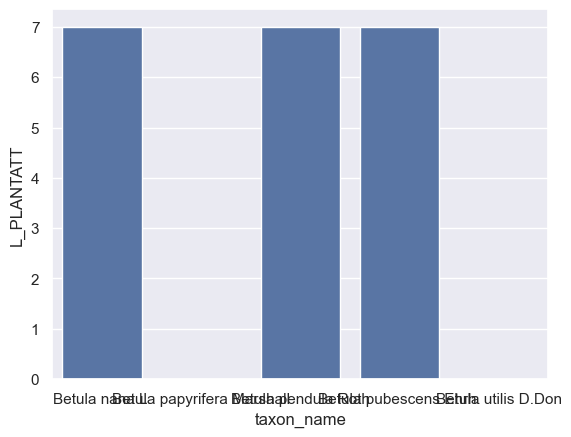

In [26]:
sns.barplot(data=Birches, x="taxon_name", y="L_PLANTATT")

Tidy, using matplotlib to rotate the x axis lables

/var/folders/h9/tfj5rjf923d157ybzsmjgfgr009lbm/T/ipykernel_49870/1358979466.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


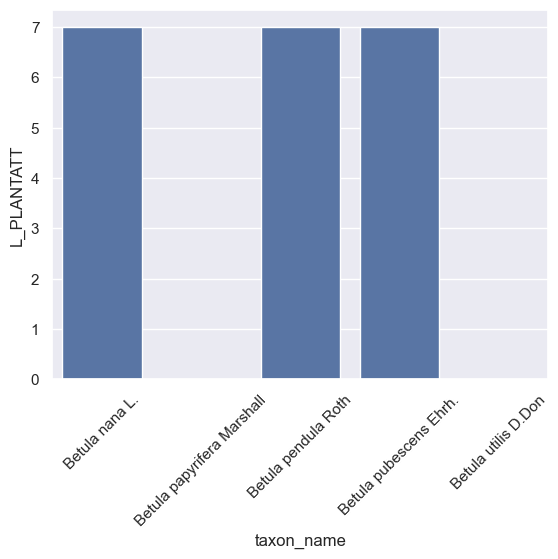

In [27]:
ax = sns.barplot(data=Birches, x="taxon_name", y="L_PLANTATT")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

The three we have data for all need lots of light.

Which is most likely to be found on poor soils?  Check the nitrogen requirements.

/var/folders/h9/tfj5rjf923d157ybzsmjgfgr009lbm/T/ipykernel_49870/667204388.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45);


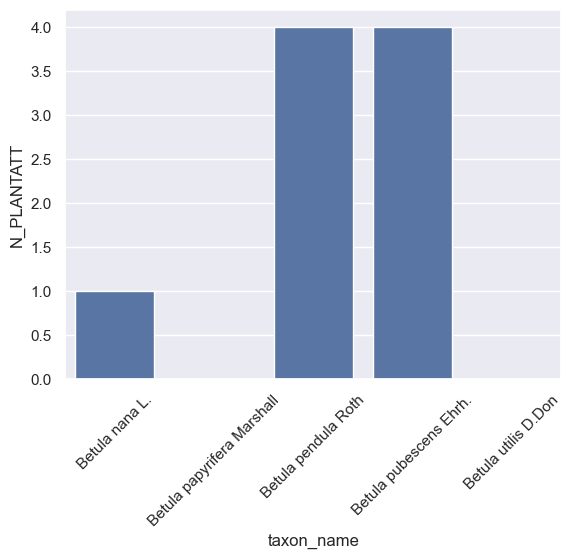

In [28]:
ax = sns.barplot(data=Birches, x="taxon_name", y="N_PLANTATT")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Of the three with data, the dwarf birch, B. nana, needs the least nitrogen

### How much data for each trait is there?  

In [29]:
BI_Flora.describe()

,SLA,LDMC,seed_mass,leaf_area,mean_veg_height,max_veg_height,L_PLANTATT,F_PLANTATT,R_PLANTATT,N_PLANTATT,S_PLANTATT,L_Doring,F_Doring,R_Doring,N_Doring,S_Doring,T_Doring,GB_Man_hectads_post2000,Ire_hectads_post2000,CI_hectads_post2000,GB_Man_hectads_1987_1999,Ire_hectads_1987_1999,CI_hectads_1987_1999,GB_Man_hectads_2000_2009,Ire_hectads_2000_2009,CI_hectads_2000_2009,GB_Man_hectads_2010_2019,Ire_hectads_2010_2019,CI_hectads_2010_2019,hybrid_propensity,scaled_hybrid_propensity,GS_1C_pg,GS_2C_pg,GS_1C_Mbp,GS_2C_Mbp
count,1795.000000,1514.000000,2174.000000,1645.000000,2415.000000,2415.000000,1779.000000,1779.000000,1779.000000,1779.000000,1779.000000,1930.000000,1892.000000,1770.000000,1866.000000,1940.000000,859.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,3130.000000,642.000000,642.000000,2117.000000,2117.000000,2117.000000,2117.000000
mean,24.458285,0.223418,59.096989,4009.606261,2.102329,3.847599,7.107926,5.842608,6.219786,4.386172,0.377178,7.069430,5.755285,6.261017,4.436227,0.375258,5.777648,473.369649,113.770288,2.272204,407.863259,93.054633,2.346006,328.500958,63.913738,1.047284,419.271565,100.265495,2.068051,2.397196,42.013584,3.398512,6.795399,3325.720590,6651.383094
std,13.488401,0.090310,704.762068,12366.361655,6.098995,11.181341,1.293594,2.271248,1.507959,1.913439,1.159378,1.416905,2.304400,1.718027,2.054866,1.217208,1.310941,726.787427,241.043356,3.963886,682.351300,213.908162,4.153351,571.379956,154.230136,2.012029,682.070603,223.639294,3.790052,2.466536,51.143780,5.976192,11.952843,5850.077661,11700.150135
min,0.508000,0.044381,0.000900,0.188000,0.001000,0.001000,2.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.080000,0.160000,81.000000,163.000000
25%,16.105139,0.156164,0.300017,213.709730,0.227564,0.450000,7.000000,4.000000,5.000000,3.000000,0.000000,6.000000,4.000000,5.000000,3.000000,0.000000,5.000000,8.000000,0.000000,0.000000,5.000000,0.000000,0.000000,4.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,4.761905,0.600000,1.200000,586.110000,1172.230000
50%,22.450000,0.210762,1.240360,922.416111,0.435937,0.800000,7.000000,5.000000,7.000000,5.000000,0.000000,7.000000,5.000000,7.000000,4.000000,0.000000,6.000000,85.500000,2.000000,0.000000,43.000000,0.000000,0.000000,37.000000,1.000000,0.000000,64.000000,1.000000,0.000000,1.000000,20.000000,1.210000,2.420000,1181.570000,2363.140000
75%,29.492500,0.279042,5.211056,2843.000000,0.893317,1.500000,8.000000,7.000000,7.000000,6.000000,0.000000,8.000000,7.000000,7.000000,6.000000,0.000000,7.000000,646.750000,70.750000,3.000000,494.750000,36.000000,3.000000,370.500000,30.000000,1.000000,517.000000,54.750000,2.000000,3.000000,100.000000,3.210000,6.410000,3136.000000,6272.000000
max,207.782755,0.678366,23993.875000,180611.540800,76.299818,120.000000,9.000000,12.000000,9.000000,9.000000,9.000000,9.000000,12.000000,9.000000,9.000000,9.000000,9.000000,2819.000000,1006.000000,14.000000,2786.000000,971.000000,15.000000,2590.000000,880.000000,10.000000,2799.000000,1002.000000,14.000000,15.000000,700.000000,88.900000,177.800000,86943.960000,173887.930000


There is a wide range - all species have occurrence range characteristics (whatever these are), very few have infomation on bud physical defence and root hairs.

 You can ask LOTS of questions.

Is leaf area or SLA (see below) related to light requirement?  Check the trait parameters first to be sure you understand what each is.

In [30]:
what_trait['SLA']

'Specific Leaf Area (total leaf area per total leaf dry mass) in mm2 mg-1, mean value taken from publicly available data from TRY database'

In [31]:
what_trait['leaf_area']

'Leaf area in mm2, mean value taken from publicly available data from TRY database'

<Axes: xlabel='leaf_area', ylabel='L_PLANTATT'>

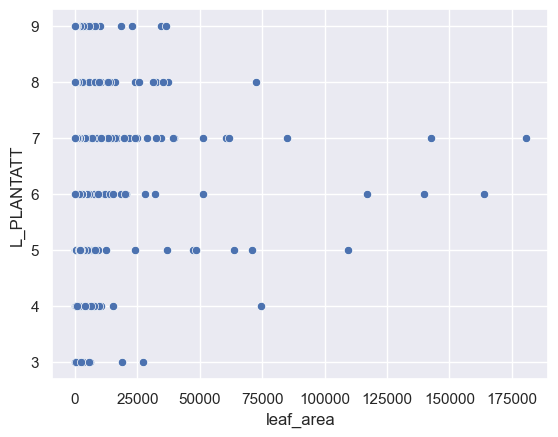

In [32]:
sns.scatterplot(data=BI_Flora, x="leaf_area", y="L_PLANTATT")

<Axes: xlabel='SLA', ylabel='L_PLANTATT'>

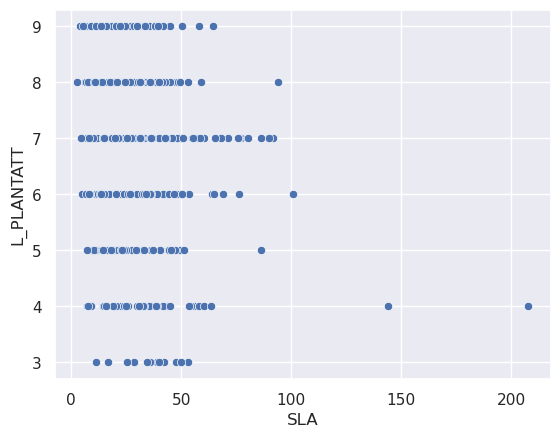

In [6]:
sns.scatterplot(data=BI_Flora, x="SLA", y="L_PLANTATT")

Weak effect of dimmer enviroments having smaller, thicker leaves?  This does not look the best way to plot it.

There are two measures for light requirements

In [33]:
what_trait['L_Doring']

'Ellenberg indicator values, describing realised niche for light, determined for central European plants'

In [76]:
what_trait['L_PLANTATT']

'Ellenberg indicator values, describing realised niche for light, small numbers indicate affinity to low light (deep shade), high numbers bright conditions, determined for British plants'

L_PLANTATT looks a better measure where available.  
Could you make a new column with L_PLANTATT where it exisits (1779 measures), but L_Doring (1930 measures) where it doesn't?  How many species are covered then?  Do you see the same relationship?  It this relationship stronger for herbs than for trees?  For perrentials or annuals?

### Adding more data

THe UK Flora database is very well curated but covers only a fraction of the data we have on the species of the UK Flora.  We have prepared two extra datasets for you: the TRY database and Ecoflora.  They have very different structures to the first dataset, so modified versions have been provided for you which will be easier to join to the British Isles Flora Dataset.

The TRY database is a global plant traits database (https://www.try-db.org/TryWeb/Home.php)  We have downloaded a selection of the leaf data for the UK Flora here:  
TRY_Leaf.csv.  
This website has detail on each trait:  
https://www.try-db.org/de/de.php

The Ecological Flora of the British Isles is a database constructed from a wide variety of sources by Dr Helen Peat and Professor Alastair Fitter at the University of York, with financial support from the British Ecological Society and the Natural Environment Research Council. It consists of data on 3842 species of higher plants that occur in the British Isles (of which some 2000 species including all the British Natives and many common introductions have ecological traits entered), together with the bibliography of sources. This version has been produced by Dr Henry Ford.

http://ecoflora.org.uk

The data comprises information on taxonomy (family, genus, specific name, authority, and vernacular name, together with common synonyms), a suite of over 130 ecological and morphological characteristics, vice-county distribution in Britain, European distribution by country, mycorrhizal associations, associated phytophagous insects and fungi. The data are obtained from the literature and the coverage varies greatly between species. The data set is therefore incomplete"

We have downloaded and re-formated the data for you here:  
Eco_Flora.csv

Join both datasets to the UK Flora dataset and explore the questions you can address:  

In [34]:
! ls

9f097d82-7560-4ed2-af13-604a9110cf6d
Eco_Flora.csv
Flora_references.md
Patterns_in_plantlife_intro_example.ipynb
TRY_Leaf.csv
UKFlora.zip
image.png


In [35]:
Eco_Flora = pd.read_csv('Eco_Flora.csv')
TRY_Leaf = pd.read_csv('TRY_Leaf.csv')

In [36]:
two_df = pd.merge(TRY_Leaf, Eco_Flora, left_on='Binomial', right_on='Species_Name', how = 'outer')

In [37]:
three_df = pd.merge(two_df, BI_Flora, left_on='Species_Name', right_on='taxon_name_binom', how = 'outer')

### What's in the full datset?

In [38]:
list(three_df.columns)

['Unnamed: 0_x',
 'Binomial',
 'Leaf Relative water content (water content / water content at saturation)',
 'Leaf Water content (molar) per leaf dry mass (WCd)',
 'Leaf Water content saturating (molar) (WCs)',
 'Leaf Water content total (molar) (WCt)',
 'Leaf area index of the site (LAI)',
 'Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded',
 'Leaf carbon content per area',
 'Leaf carbon content per dry mass',
 'Leaf carbon/nitrogen (C/N) ratio',
 'Leaf carotenoid content per dry mass',
 'Leaf chlorophyll a content per dry mass',
 'Leaf chlorophyll a+b content per area',
 'Leaf chlorophyll a/b ratio',
 'Leaf chlorophyll b content per dry mass',
 'Leaf chlorophyll content (a+b) per dry mass',
 'Leaf compoundness',
 'Leaf dry matter content per leaf water-saturated mass (LDMC)',
 'Leaf lamina thickness',
 'Leaf lifespan (longevity, retention time, LL)',
 'Leaf nitrogen content per area (Narea)',
 'Leaf nitrogen content 

Is there enough data to compare parastic plants to autotrophs?

In [39]:
three_df["Nutrition (autotroph versus heterotroph)"].value_counts()

Nutrition (autotroph versus heterotroph)
autotrophic       1622
hemi-parasitic      30
parasitic           10
mycotrophic          5
aurotrophic          1
Name: count, dtype: int64

We do have a fair number of non-autotrophic plants, but a decisions would need to be made as where to place the hemiparatics plants.  
'aurotrophic'  must be a typing error and will need correcting.  
Check the row.  

In [40]:
three_df[three_df["Nutrition (autotroph versus heterotroph)"].str.contains('aurotrophic')==True]

,Unnamed: 0_x,Binomial,Leaf Relative water content (water content / water content at saturation),Leaf Water content (molar) per leaf dry mass (WCd),Leaf Water content saturating (molar) (WCs),Leaf Water content total (molar) (WCt),Leaf area index of the site (LAI),Leaf area: in case of compound leaves undefined if leaf or leaflet; undefined if petiole and rhachis in- or excluded,Leaf carbon content per area,Leaf carbon content per dry mass,Leaf carbon/nitrogen (C/N) ratio,Leaf carotenoid content per dry mass,Leaf chlorophyll a content per dry mass,Leaf chlorophyll a+b content per area,Leaf chlorophyll a/b ratio,Leaf chlorophyll b content per dry mass,Leaf chlorophyll content (a+b) per dry mass,Leaf compoundness,Leaf dry matter content per leaf water-saturated mass (LDMC),Leaf lamina thickness,"Leaf lifespan (longevity, retention time, LL)",Leaf nitrogen content per area (Narea),Leaf nitrogen content per dry mass (Nmass),Leaf petiole length,Leaf phenology type,Leaf phosphorus content per area (Parea),Leaf phosphorus content per dry mass (Pmass),Leaf position,Leaf respiration per area at leaf temperature,Leaf respiration per dry mass,Leaf shape: 2. outline,Leaf shape: 3. pointed/round,Leaf shape: 4. length versus breadth,Leaf shape: 5. leaf base,Leaf shape: 6. leaf petiole type,Leaf thickness,Leaf tissue density,Leaf transpiration (molar) per dry mass,Leaf transpiration rate per dry mass (daytime),Leaf water content per leaf dry mass,"Leaf water content per leaf water-saturated mass (LWC, 1-LDMC)",Leaf water content saturating,Leaf water content total,Leaf water saturation deficit,Unnamed: 0_y,Species_Name,Actual EvapoTranspiration,After-ripening requirement,Altitude,Altitude (maximum recorded),Altitude (minimum recorded),Altitude (typical minimum),Annual precipitation,Annual seed dispersal,Appendages on dispersal unit,Average annual relative humidity,Average number of ground frost days per year (sum) (FRS),British distribution (post 1949 records),Carnivory,Change Index,Chromosome cDNA content,Chromosome number,Chromosome ploidy,Cleistogamy,Clonality,Cloud cover,"Comments, notes, methods",Dataset (1),Dataset (2),Dichogamy,"Dicliny (monoeceous, dioecious, hermaphrodite)",Dispersal syndrome (agent),Dispersal unit (dispersule / diaspore) length,EW Index,Ecosystem rooting depth,Ellenberg indicator value: Light,Ellenberg indicator value: Moisture,Ellenberg indicator value: Salt tolerance,Ellenberg indicator value: nitrogen,Ellenberg indicator value: pH (reaction),End of flowering,Epoch,Exposure,Family,Fern and moss spore width (diameter),Fertilization,Fine root diameter,First historical record: 1. date,First historical record: 2. site,Flow,Flower pollen ovule ratio,Flowering periode: peak month,Fossil record: 1. earliest record,Fossil record: 2. earliest postglacial record,Fraction of absorbed photosynthetic active radiation (FAPAR) of the site,GPP of the site,Genera growth form,Germination requirements 1. chilling,Germination requirements 2. light,Germination requirements 3. temperature fluctuation,Germination type,Habitat / plot description,Heteromorphy,Heterophylly,Identifier within contributed dataset (ID),Inbreeding,Incompatibility systems,Intensity of mycorrhizal infection,January mean temperature,July mean temperature,Latitude,Length of growing season (LGP),Location / Site Name,Location Country,Longitude,Major Phylogenetic Group,Maximum Green Vegetation Fraction,Maximum depth of leaves in the canopy,Maximum temperature at which 50% seeds germinate,Maximum temperature of germination,Mean annual sum of potential evapotranspiration (PET),Mean annual temperature (MAT),Mean clear-sky surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements,Mean cloud forcing surface radiation budget from ERBE global: Global shortwave radiation budget data derived from 5 Years of ERBE measurements,Mean cloud surface radiation budget from ERBE global: Global shortwave radiation budget

Lunaria annua is the plant commonly known as 'Honesty' or 'Silver pennies', with distinctive round seed pods.  Correct the error.

In [41]:
three_df["Nutrition (autotroph versus heterotroph)"].replace('aurotrophic','autotrophic', inplace=True)

Check it's worked:

In [42]:
three_df["Nutrition (autotroph versus heterotroph)"].value_counts()

Nutrition (autotroph versus heterotroph)
autotrophic       1623
hemi-parasitic      30
parasitic           10
mycotrophic          5
Name: count, dtype: int64

Good to go for examining how these classes of plants vary in their traits

### Flowering time

Look at the distribution of the time of onset of flowering by month (1 = January).  This could lead to lots of questions about annuals/perenials, pollination strategy, growth rates, habitats etc...

In [43]:
three_df["Onset of flowering (first flowering date, beginning of flowering period)"].value_counts()

Onset of flowering (first flowering date, beginning of flowering period)
6.0     525
5.0     324
7.0     307
4.0     138
3.0      62
8.0      40
1.0      17
2.0      11
9.0       6
12.0      2
49.0      1
11.0      1
10.0      1
Name: count, dtype: int64

What about pollination data?

In [44]:
three_df["Pollination syndrome (pollen vector)"].value_counts()

Pollination syndrome (pollen vector)
insect     905
wind       374
selfed     122
water       16
insects      6
Name: count, dtype: int64

See the error here?  'insects' needs to be corrected to 'insect'.  You can do as you did above for 'aurotrophic'.  
Always check for errors in dataframe.  A numerical typo should show up as an outlier


The TRY and Eco_Flor data will be a little noisier than the UK_Flora dataset and there will be many more missing values, but they add information on many more traits.

### What do you want to know about UK flowering plants? 

Explore the dataframe to find a hypothesis to test.  Posibilities include:  

Taller herbs need nitrogen rich environments  
Wind pollinated species have wider distributions  
Non-native species tend to be weedy  
Trees have bigger seeds than herbs  
Weedy species are spreading across the UK faster than non-weedy  
Species that can self pollinate have bigger genomes  
Perrenial species flower earlier than annuals  
Larger, thicker leaves support the production of bigger seeds  
Non native species are more likley to hybridise than native  

### Further reading

Some references which might be useful for ideas:

Brown, M.R., Hollingsworth, P.M., Forrest, L.L., Hart, M.L., Leitch, I.J., Jones, L., Ford, C., De Vere, N. and Twyford, A.D., 2023. Genetic factors predict hybrid formation in the British flora. Proceedings of the National Academy of Sciences, 120(16), p.e2220261120.

Barajas Barbosa, M.P., Craven, D., Weigelt, P. et al. Assembly of functional diversity in an oceanic island flora. Nature 619, 545–550 (2023). https://doi.org/10.1038/s41586-023-06305-z

Lenzner, B., Latombe, G., Schertler, A., Seebens, H., Yang, Q., Winter, M., Weigelt, P., van Kleunen, M., Pyšek, P., Pergl, J. and Kreft, H., 2022. Naturalized alien floras still carry the legacy of European colonialism. Nature Ecology & Evolution, 6(11), pp.1723-1732.

Kent, M., Stevens, R.A. and Zhang, L. (1999), Urban plant ecology patterns and processes: a case study of the flora of the City of Plymouth, Devon, U. K.. Journal of Biogeography, 26: 1281-1298. https://doi.org/10.1046/j.1365-2699.1999.00350.x

Loram, A., Thompson, K., Warren, P.H. and Gaston, K.J. (2008), Urban domestic gardens (XII): The richness and composition of the flora in five UK cities. Journal of Vegetation Science, 19: 321-330. https://doi.org/10.3170/2008-8-18373

Walker, K.J., Preston, C.D. Ecological Predictors of Extinction Risk in the Flora of Lowland England, UK. Biodivers Conserv 15, 1913–1942 (2006). https://doi.org/10.1007/s10531-005-4313-4

Thompson, K., & Ceriani, R. M. (2003). No Relationship between Range Size and Germination Niche Width in the UK Herbaceous Flora. Functional Ecology, 17(3), 335–339. http://www.jstor.org/stable/3599088

Vendramini, F., Díaz, S., Gurvich, D.E., Wilson, P.J., Thompson, K. and Hodgson, J.G. (2002), Leaf traits as indicators of resource-use strategy in floras with succulent species. New Phytologist, 154: 147-157. https://doi.org/10.1046/j.1469-8137.2002.00357.x

Küster, E.C., Kühn, I., Bruelheide, H. and Klotz, S. (2008), Trait interactions help explain plant invasion success in the German flora. Journal of Ecology, 96: 860-868. https://doi.org/10.1111/j.1365-2745.2008.01406.x

Bourgeois, B., Munoz, F., Fried, G., Mahaut, L., Armengot, L., Denelle, P., Storkey, J., et al. 2019. What makes a weed a weed? A large-scale evaluation of arable weeds through a functional lens. American Journal of Botany 106(1): 90–100.
